# Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('C:/Users/Postb/Documents/GitHub/IDS/data/insurance.csv')

a) Clustering

[[-0.84184665 -0.30151298 -0.5270176  -0.58239982]
 [ 0.82958699  0.33701896 -0.4556558   0.64352532]
 [ 0.05843855 -0.03226567  1.33658208 -0.05238068]]
Cluster centroids (back in original feature scale):


c:\Users\Postb\anaconda3\envs\ids_enviroment\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Postb\anaconda3\envs\ids_enviroment\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,age,bmi,children,charges
cluster,,,,
0,27.38,28.83,0.46,6220.19
1,50.86,32.72,0.55,21060.61
2,40.03,30.47,2.71,12636.33


Cluster sizes:


,count
cluster,
0,498
1,480
2,360


Smoker vs. non-smoker counts per cluster:


smoker,smoker_no,smoker_yes
cluster,,
0,443,55
1,323,157
2,298,62


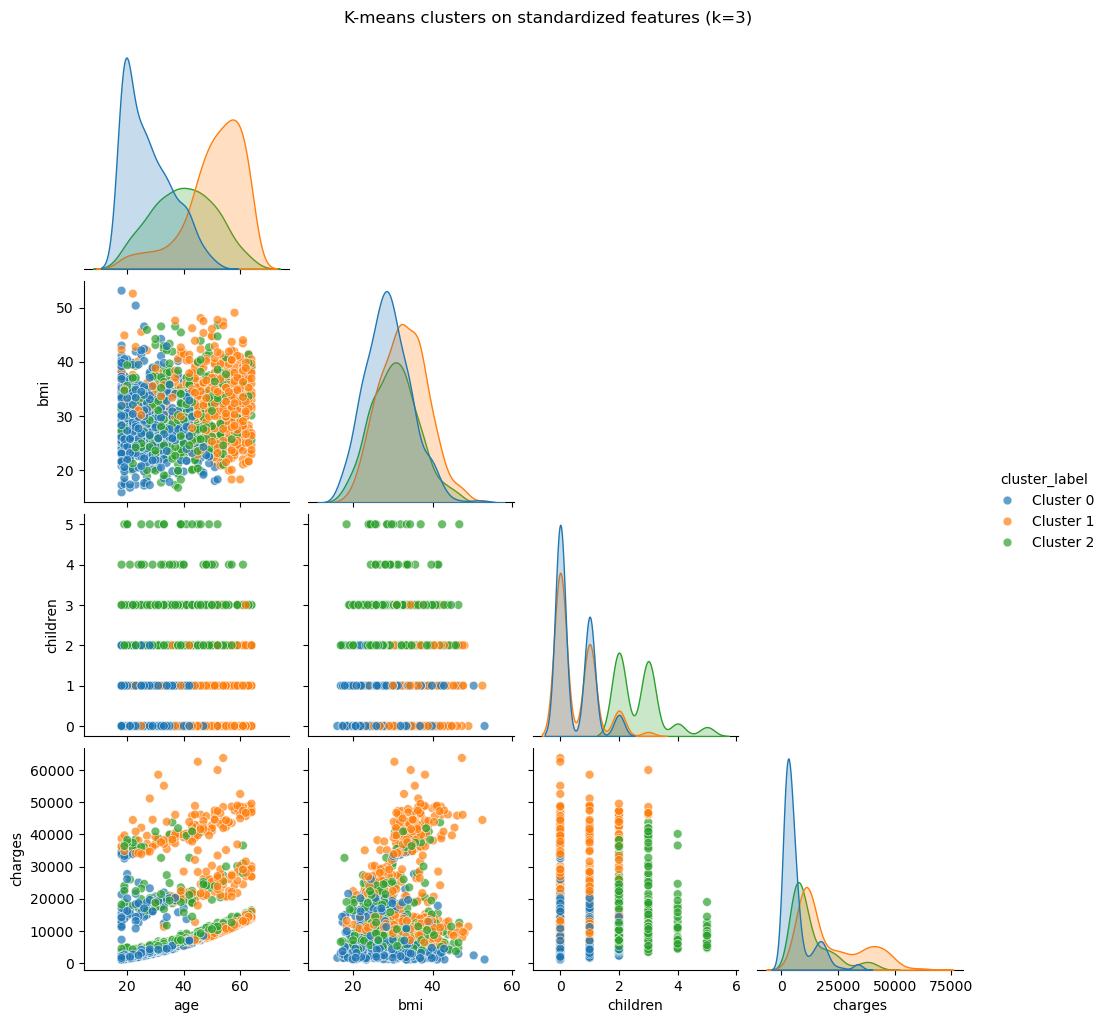

,id,age,sex,bmi,children,smoker,region,charges,cluster,cluster_label
0,1,23,male,23.845,0,no,northeast,2395.17155,0,Cluster 0
1,2,60,female,36.005,0,no,northeast,13228.84695,1,Cluster 1
2,3,34,female,31.920,1,yes,northeast,37701.87680,1,Cluster 1
3,4,19,female,28.600,5,no,southwest,4687.79700,2,Cluster 2
4,5,19,male,20.425,0,no,northwest,1625.43375,0,Cluster 0


In [7]:
# K-means clustering on standardized features
feature_cols = ['age', 'bmi', 'children', 'charges']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[feature_cols])

#kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(X_scaled)
cluster_labels = kmeans.fit_predict(X_scaled)
clustered_df = data.copy()
clustered_df['cluster'] = cluster_labels
clustered_df['cluster_label'] = clustered_df['cluster'].map(lambda idx: f'Cluster {idx}')

print(kmeans.cluster_centers_)

centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=feature_cols,
)
centroids['cluster'] = centroids.index
centroids = centroids[['cluster'] + feature_cols]

cluster_sizes = clustered_df['cluster'].value_counts().sort_index().to_frame(name='count')
smoker_counts = (
    clustered_df.groupby(['cluster', 'smoker']).size().unstack(fill_value=0).rename(
        columns={'yes': 'smoker_yes', 'no': 'smoker_no'}
    )
)

print('Cluster centroids (back in original feature scale):')
display(centroids.set_index('cluster').round(2))
print('Cluster sizes:')
display(cluster_sizes)
print('Smoker vs. non-smoker counts per cluster:')
display(smoker_counts.astype(int))

pairplot_features = clustered_df[feature_cols + ['cluster_label']]
sns.pairplot(
    pairplot_features,
    vars=feature_cols,
    hue='cluster_label',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40},
)
plt.suptitle('K-means clusters on standardized features (k=3)', y=1.02)
plt.show()

clustered_df.head()


Clusters reveal three groups: a young, low-charge group (`Cluster 0`), a high-charge group of older adults with higher BMI and more smokers (`Cluster 1`), and a mid-age group with multiple children and moderate charges (`Cluster 2`).
Smoker counts show that `Cluster 1` concentrates most smokers, aligning with its high average charges, while `Cluster 0` and `Cluster 2` are dominated by non-smokers.
Pairplot separations mainly happen along the charges axis (driven by smoking status) and, to a lesser extent, age/children, indicating charges and smoking are the key drivers for these clusters.
